# Data Visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
ipo_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/COTAHIST_A2015_2021.csv")
ipo_details = pd.read_excel("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_details.xlsx")
cota_ibov = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/COTAHIST_IBOV.csv")
sns.set_palette('Dark2')

In [2]:
tickers = list(ipo_details.TICKER)
openings = list(ipo_details['PREÇO POR AÇÃO'])
dict_tickers = dict(zip(tickers, openings))

In [3]:
date_list = []
for ticker in tickers:
    df = ipo_df[ipo_df.codneg==ticker]
    date_list.append(df["date"].iloc[0])
    
date_ipo_df = pd.DataFrame(list(zip(tickers, date_list)), columns=["tickers", "date"])
date_ipo_df["date"] = pd.to_datetime(date_ipo_df["date"], format='%Y-%m-%d')
date_ipo_df

,tickers,date
0,WIZS3,2015-06-05
1,AALR3,2016-10-28
2,MOVI3,2017-02-08
3,PARD3,2017-02-14
4,AZUL4,2017-04-11
...,...,...
64,GGPS3,2021-04-26
65,SOJA3,2021-04-29
66,CXSE3,2021-04-29
67,MODL11,2021-04-30


In [4]:
lista = []
for i in range(2015, 2022):
    quant = date_ipo_df[date_ipo_df['date'].dt.year == i].count()[0]
    lista.append(quant)

ipos_per_year = list(zip([str(i) for i in range(2015, 2022)], lista))
ipos_per_year = pd.DataFrame(ipos_per_year, columns=["Year", "Quantity"])
ipos_per_year

,Year,Quantity
0,2015,1
1,2016,1
2,2017,9
3,2018,3
4,2019,5
5,2020,27
6,2021,23


In [5]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [6]:
rent_1d = pd.DataFrame(columns=["1D"])
time = [1]
for t in tickers:
    rent_1d.loc[t] = [rentability(t, c) for c in time]    

In [7]:
rent_1d

,1D
WIZS3,12.733171
AALR3,-4.000000
MOVI3,-2.666667
PARD3,8.947368
AZUL4,6.666667
...,...
GGPS3,6.666667
SOJA3,46.464646
CXSE3,3.929679
MODL11,-7.296352


## Quantity of IPO's per Year

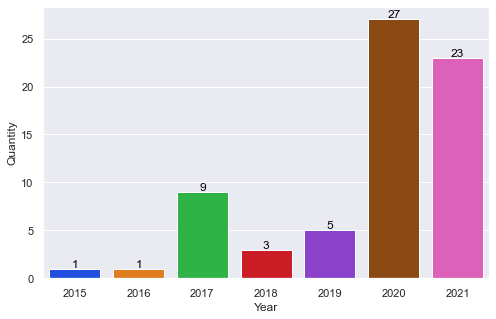

In [8]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_palette('bright')
quant_year_b = sns.barplot(x="Year", y="Quantity", data=ipos_per_year)
for index, row in ipos_per_year.iterrows():
    quant_year_b.text(row.name, row.Quantity+0.175, round(row.Quantity,2), color="black", ha="center")

## IPO ETF

In [9]:
rent_by_day = ipo_df.pivot_table(values='preult', index='date', columns='codneg')
for c in rent_by_day:
    rent_by_day[c] = ((rent_by_day[c] / dict_tickers[c]) - 1)* 100

rent_by_day_mean = rent_by_day.mean(axis=1)
rent_by_day_mean = pd.DataFrame(data=rent_by_day_mean, columns=['variation'])
rent_by_day_mean = rent_by_day_mean.reset_index()

In [23]:
rent_by_day[rent_by_day.index=='2019-07-01']

codneg,AALR3,AERI3,ALLD3,ALPK3,AMBP3,AVLL3,AZUL4,BIDI4,BKBR3,BLAU3,...,RRRP3,SBFG3,SEQL3,SOJA3,SOMA3,TFCO4,VAMO3,VIVA3,WEST3,WIZS3
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,-29.0,NaN,NaN,NaN,NaN,NaN,100.428571,1904.324324,19.111111,NaN,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.651257


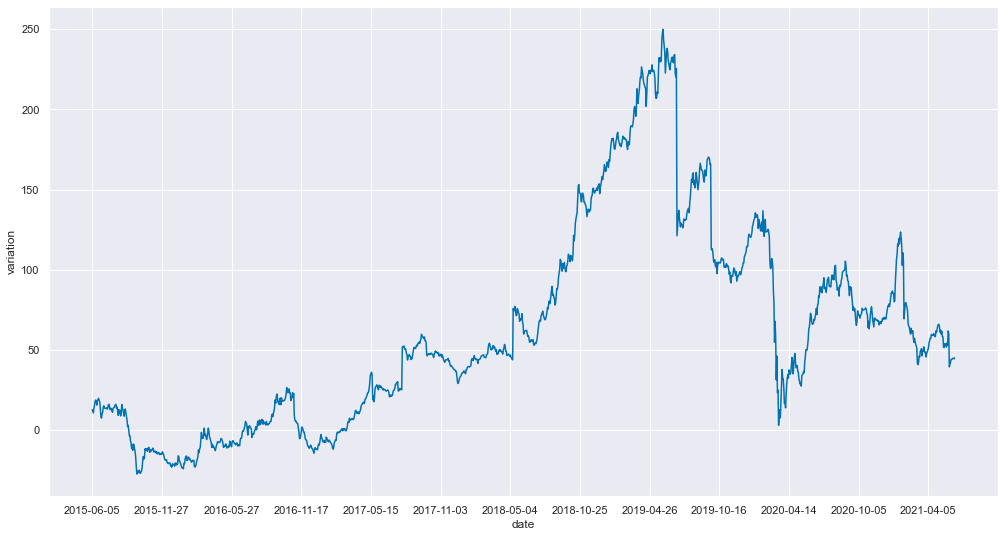

In [10]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=rent_by_day_mean, x='date', y='variation')
axes.xaxis.set_major_locator(loc)

## Mean Rentability 

## Comparison Rentability 2015-2019 and 2020

## Deaths by Covid and Volatility

## Correlation Death x Volatility

## Histogram IPO's Return of first day closing


<AxesSubplot:xlabel='1D', ylabel='Count'>

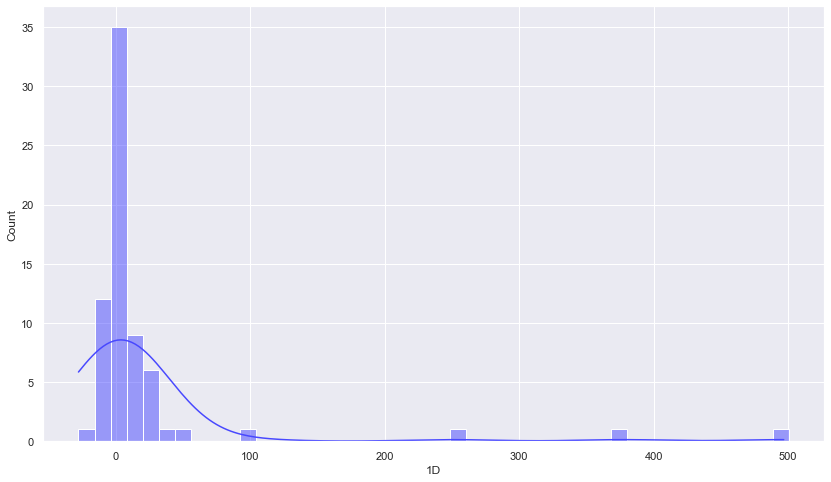

In [11]:
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette('bwr')
sns.histplot(rent_1d, x='1D', binwidth=12, kde=True)

## Comparison 'IPO ETF' and IBOVESPA

In [12]:
rent_by_day = ipo_df.pivot_table(values='preult', index='date', columns='codneg')
for c in rent_by_day:
    rent_by_day[c] = ((rent_by_day[c] / dict_tickers[c]) - 1)* 100

rent_by_day_mean = rent_by_day.mean(axis=1)
rent_by_day_mean = pd.DataFrame(data=rent_by_day_mean, columns=['variation'])
rent_by_day_mean = rent_by_day_mean.reset_index()
rent_by_day_mean = rent_by_day_mean.set_index('date')

In [13]:
cota_ibov = cota_ibov.reset_index()
cota_ibov = cota_ibov.set_index('Data')

In [14]:
ipo_ibov = pd.concat([rent_by_day_mean, cota_ibov], axis = 1)

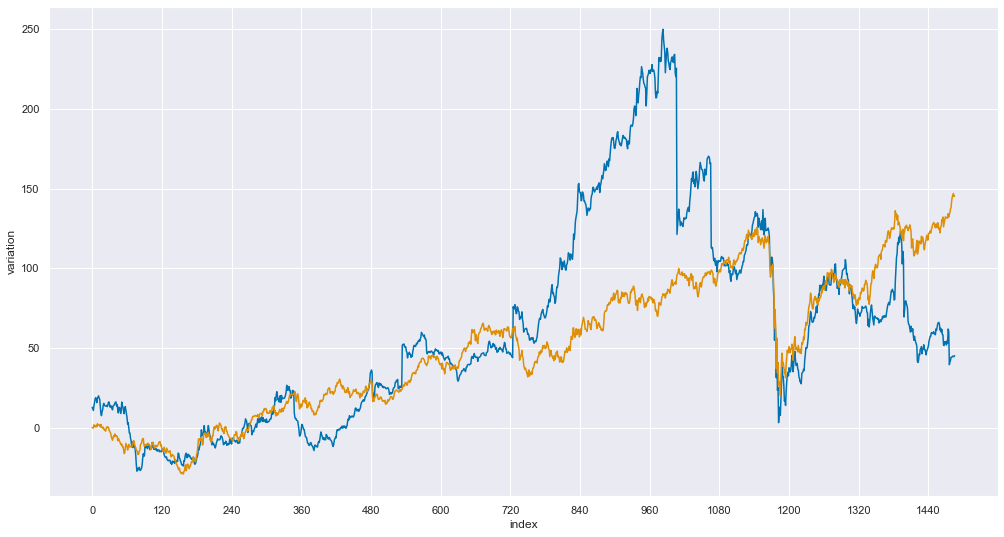

In [15]:
sns.set(rc={'figure.figsize':(17,9)})
sns.set_palette('colorblind')
loc = plticker.MultipleLocator(base=120.0)
axes = sns.lineplot( data=ipo_ibov, x='index', y='variation')
axes2 = sns.lineplot(data=ipo_ibov, x = 'index', y='Cumulative')
axes.xaxis.set_major_locator(loc)